In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from funcs import tikhanov_regularization, gaussian_noise, plot_settings, norm_pow_2

plt.rcParams['figure.figsize'] = (15, 5)
plot_settings()

In [2]:
# заводим функции
# 1-v

mu = 8*1e5
f_0 = 300

x_ = lambda t: np.cos(2*np.pi*f_0*t + mu*t**2)

beta = 3*1e3

def k_(t, beta=beta):
    return np.exp(-beta*t)

size = 1000

a, b = 0, 0.01

t = np.linspace(a, b, size)

k = k_(t)
x_exact = x_(t)

f = np.convolve(k, x_exact)

t_conv = np.linspace(a, (t[1]-t[0])*len(f), len(f))

g = lambda beta_1: abs(beta - beta_1) / beta * 100

In [3]:
def optimal_alpha(sigma, k,  f_n, alpha_0 = 1e-3) -> float:
    """
    известна сигма
    """
    x = lambda alpha: tikhanov_regularization(f_n, k, t, alpha)[:t.size]
    Ax = lambda alpha: np.convolve(k, x(alpha))
    func = lambda alpha: np.abs(np.linalg.norm(f_n - Ax(alpha))**2 - sigma**2)
    res = sp.optimize.minimize(func, alpha_0, method="TNC")
    return res.x[0]

In [4]:
beta_upper = [beta - beta*0.1, beta - beta*0.05]

g_upper = [g(b) for b in beta_upper]

k_noise = [k_(t, b) for b in beta_upper]

sigma = 0.001

n = 100

In [5]:
alpha0 = [None]*n

for i in range(n):
    f_noise = f + gaussian_noise(f.shape, sigma=sigma)
    alpha0[i] = optimal_alpha(sigma, k, f_noise)

In [6]:
alpha1 = [None]*n

for i in range(n):
    f_noise = f + gaussian_noise(f.shape, sigma=sigma)
    alpha1[i] = optimal_alpha(sigma, k_noise[0], f_noise)

In [7]:
alpha2 = [None]*n

for i in range(n):
    f_noise = f + gaussian_noise(f.shape, sigma=sigma)
    alpha2[i] = optimal_alpha(sigma, k_noise[1], f_noise)

Text(0.5, 1.0, 'log(alpha) histogram for sigma=0.001 and g=0%')

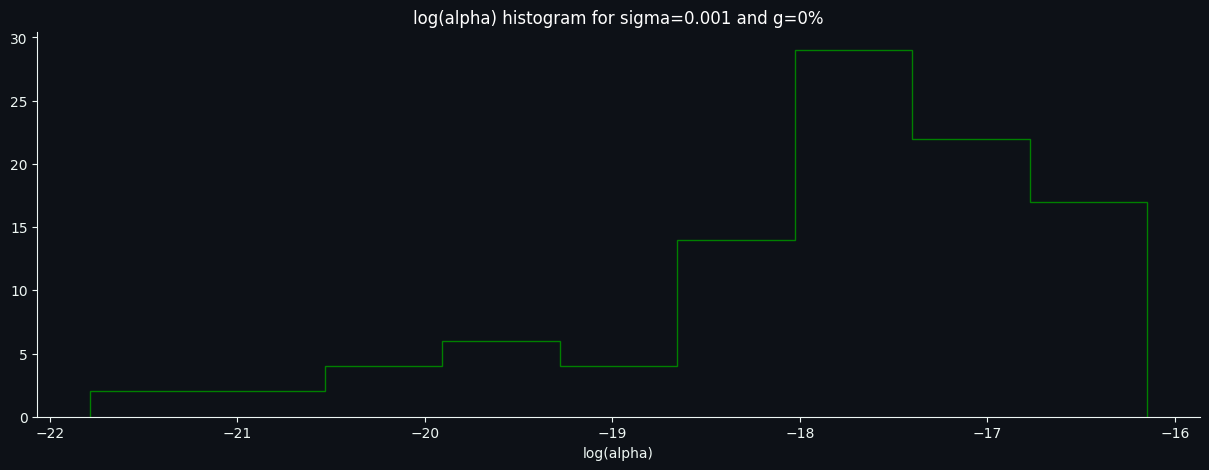

In [8]:
n_bins = int(np.sqrt(n))

alpha_log_0 = np.log(np.abs(alpha0))

plt.hist(alpha_log_0, bins=np.linspace(min(alpha_log_0), max(alpha_log_0), n_bins), histtype="step")
plt.xlabel("log(alpha)")
plt.title(f"log(alpha) histogram for sigma={sigma} and g=0%", color='w')

Text(0.5, 1.0, 'log(alpha) histogram for sigma=0.001 and g=10.0000%')

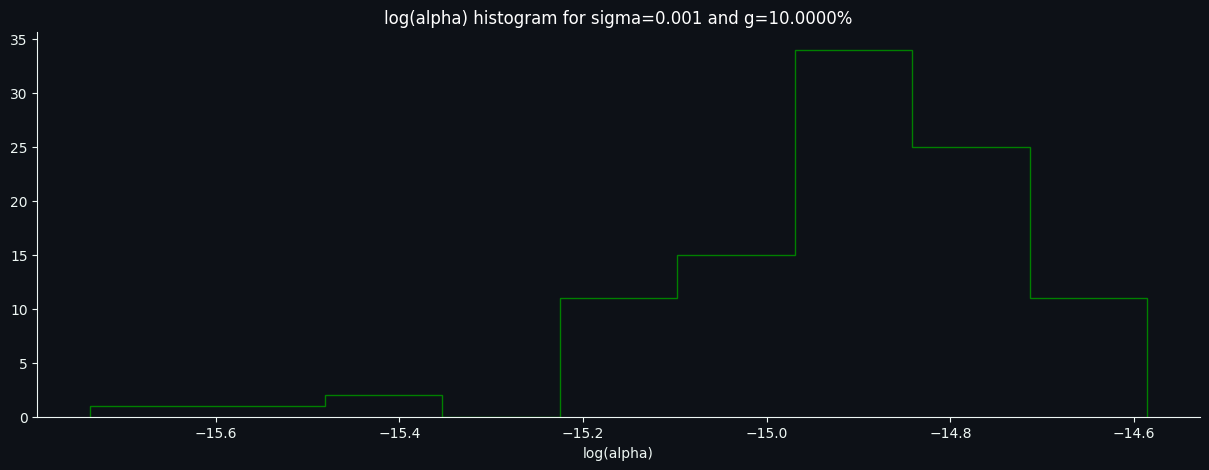

In [9]:
n_bins = int(np.sqrt(n))

alpha_log_1 = np.log(np.abs(alpha1))

plt.hist(alpha_log_1, bins=np.linspace(min(alpha_log_1), max(alpha_log_1), n_bins), histtype="step")
plt.xlabel("log(alpha)")
plt.title(f"log(alpha) histogram for sigma={sigma} and g={g_upper[0]:.4f}%", color='w')

Text(0.5, 1.0, 'log(alpha) histogram for sigma=0.001 and g=5.0000%')

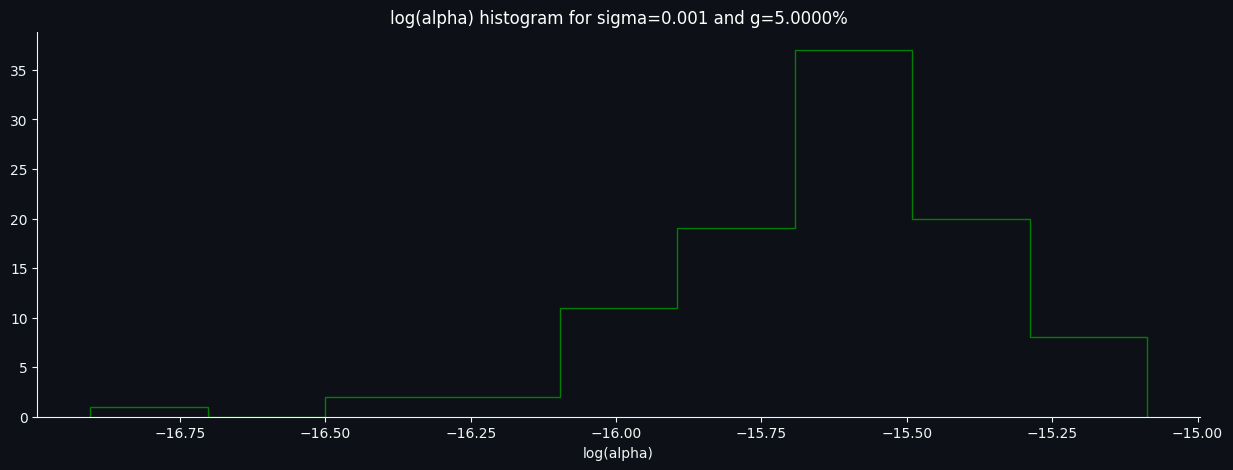

In [10]:
n_bins = int(np.sqrt(n))

alpha_log_2 = np.log(np.abs(alpha2))

plt.hist(alpha_log_2, bins=np.linspace(min(alpha_log_2), max(alpha_log_2), n_bins), histtype="step")
plt.xlabel("log(alpha)")
plt.title(f"log(alpha) histogram for sigma={sigma} and g={g_upper[1]:.4f}%", color='w')

In [11]:
# beta

betas = np.linspace(beta, beta*1.5, n)
xs = [None]*n

error_1 = [None]*n

error_ex = [None]*n
error_ex_1 = [None]*n
f_noise = f + gaussian_noise(f.shape, sigma=sigma)
for i in range(n):
    a = optimal_alpha(sigma, k_(t, betas[i]), f_noise)
    xs[i] = tikhanov_regularization(f_noise, k_(t, betas[i]), t, a)[:t.shape[0]]
    a = optimal_alpha(sigma, k_(t), f_noise)
    x_b = tikhanov_regularization(f_noise, k_(t), t, a)[:t.shape[0]]

    error_1[i] = np.linalg.norm((xs[i] - x_b))**2
    error_ex[i] = np.linalg.norm((x_exact - x_b))**2
    error_ex_1[i] = np.linalg.norm((x_exact - xs[i]))**2

Text(0.5, 0, 'g')

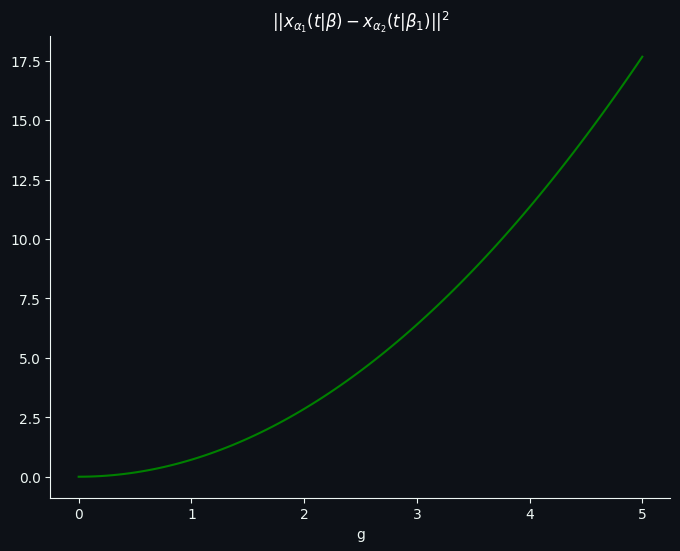

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 5, n), error_1)
plt.title(r"$||x_{\alpha_1}(t|\beta) - x_{\alpha_2}(t|\beta_1)||^2$", color='w')
plt.xlabel("g")

Text(0.5, 0, 'g')

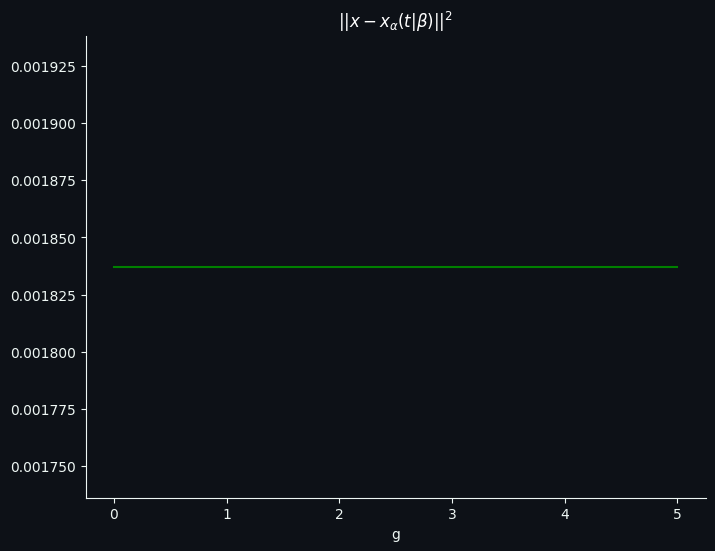

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 5, n), error_ex)
plt.title(r"$||x - x_{\alpha}(t|\beta)||^2$", color='w')
plt.xlabel("g")

In [14]:
betas

array([3000.        , 3015.15151515, 3030.3030303 , 3045.45454545,
       3060.60606061, 3075.75757576, 3090.90909091, 3106.06060606,
       3121.21212121, 3136.36363636, 3151.51515152, 3166.66666667,
       3181.81818182, 3196.96969697, 3212.12121212, 3227.27272727,
       3242.42424242, 3257.57575758, 3272.72727273, 3287.87878788,
       3303.03030303, 3318.18181818, 3333.33333333, 3348.48484848,
       3363.63636364, 3378.78787879, 3393.93939394, 3409.09090909,
       3424.24242424, 3439.39393939, 3454.54545455, 3469.6969697 ,
       3484.84848485, 3500.        , 3515.15151515, 3530.3030303 ,
       3545.45454545, 3560.60606061, 3575.75757576, 3590.90909091,
       3606.06060606, 3621.21212121, 3636.36363636, 3651.51515152,
       3666.66666667, 3681.81818182, 3696.96969697, 3712.12121212,
       3727.27272727, 3742.42424242, 3757.57575758, 3772.72727273,
       3787.87878788, 3803.03030303, 3818.18181818, 3833.33333333,
       3848.48484848, 3863.63636364, 3878.78787879, 3893.93939

Text(0.5, 0, 'g')

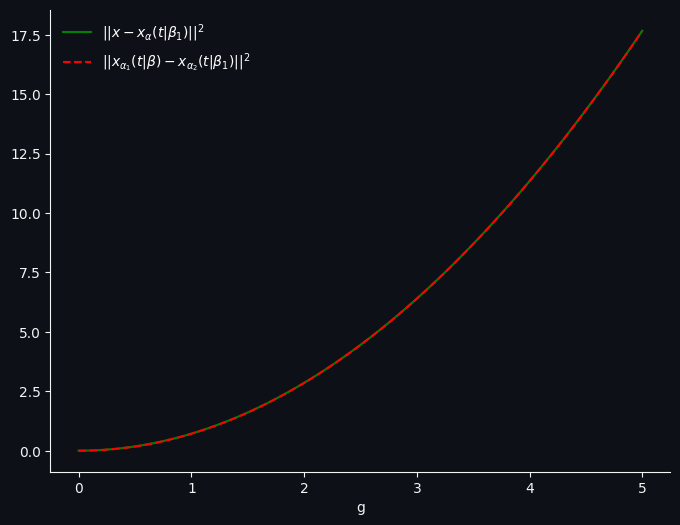

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 5, n), error_ex_1, label=r"$||x - x_{\alpha}(t|\beta_1)||^2$")
plt.plot(np.linspace(0, 5, n), error_1, '--', label=r"$||x_{\alpha_1}(t|\beta) - x_{\alpha_2}(t|\beta_1)||^2$")
plt.legend(labelcolor="w")
# plt.ylim(0, 0.01)
# plt.xlim(0, 0.5)
plt.xlabel("g")

Text(0.5, 0, 'g')

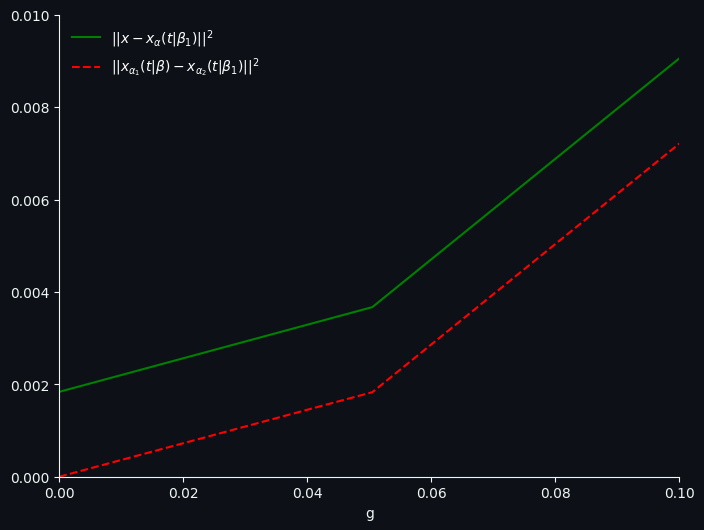

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 5, n), error_ex_1, label=r"$||x - x_{\alpha}(t|\beta_1)||^2$")
plt.plot(np.linspace(0, 5, n), error_1, '--', label=r"$||x_{\alpha_1}(t|\beta) - x_{\alpha_2}(t|\beta_1)||^2$")
plt.legend(labelcolor="w")
plt.ylim(0, 0.01)
plt.xlim(0, 0.1)
plt.xlabel("g")

In [16]:
max(abs(xs[0] - x_exact))

0.005139087048864899